In [16]:
# Importing some required packages
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import numpy as np

<h4>You can download data from <a href='https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'><i>here</i></a></h4>

In [2]:
# data directory for train dataset
data_dir_train=r'X:\NN\chest-xray-pneumonia\chest_xray\train'

# data directory for test dataset
data_dir_test=r'X:\NN\chest-xray-pneumonia\chest_xray\test'

# List of Target Categories
categories=['NORMAL','PNEUMONIA']


In [3]:
# Creating the Function for data preparation
def create_data(path:str,img_size: int =50): -> list(list)
    data=[]
    for category in categories:
        label=categories.index(category)
        for img in os.listdir(os.path.join(path,category)):
            image=cv2.imread(os.path.join(os.path.join(path,category),img),cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image,(img_size,img_size))
            data.append([image,label])
    return data        

In [4]:
# Creating data for training and testing
train_data=create_data(data_dir_train)
test_data=create_data(data_dir_test)

In [60]:
# Seperating the numpy image array and image label and reshaping for train data
X,Y=list(),list()
for i,j in train_data:
    X.append(i)
    Y.append(j)
X=np.array(X).reshape(-1,50,50,1)/255.0
Y=np.array(Y)

In [71]:
# Seperating the numpy image array and image label and reshaping for test data
X_t,Y_t=list(),list()
for i,j in test_data:
    X_t.append(i)
    Y_t.append(j)
X_t=np.array(X_t).reshape(-1,50,50,1)/255.0
Y_t=np.array(Y_t)

[Text(0, 0.5, 'Number of Images-'), Text(0.5, 0, 'Target')]

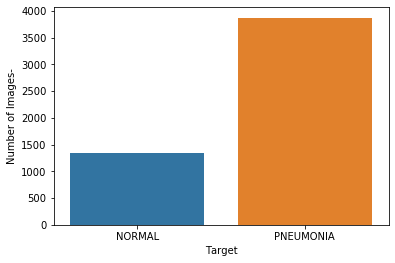

In [84]:
# Checking the image distribution over the target classes
sns.countplot(list(map(lambda x : categories[x],Y))).set(xlabel="Target", ylabel = "Number of Images-")

<h3 style="color:blue">Data is <i style="color:red">HIGHLY IMBALANCED</i>. Which will result in biased predictions </h3> 

In [62]:
# Generating the data to balance both the classes
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X)

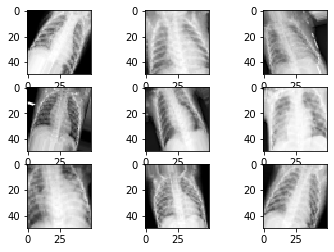

In [41]:
# Plotting the newly generated images
for i ,j in datagen.flow(X,Y,batch_size=9):
    for it in range(9):
        plt.subplot(330 + 1 + it)
        plt.imshow(i[it].reshape(50,50), cmap='gray')
    break
    

In [89]:
# Creating the function for building the model
def model_build(activation='relu',optimizer='adam',padding='same',count_of_cnn=2,cnn_filters=[64,128]):
    model=Sequential(name='chest xray')
    model.add(Conv2D(32,(3,3),activation=activation,padding=padding,input_shape=(50,50,1),name='CONV_1'))
    model.add(MaxPool2D((2,2),padding=padding,name='MAXPOOL_1'))
    
    for i in  range(count_of_cnn):
        model.add(Conv2D(cnn_filters[i],(3,3),activation=activation,padding=padding,name=f'CONV_{i+2}'))
        model.add(MaxPool2D((2,2),padding=padding,name=f'MAXPOOL_{i+2}'))
    model.add(Flatten(name='Flatten'))
    model.add(Dense(128,activation=activation,name='Dense_1'))
    model.add(Dropout(0.5,name='Dropout'))
    
    model.add(Dense(1,activation='sigmoid',name='Output_layer'))
    
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [90]:
# Building the model
model=model_build(count_of_cnn=3,cnn_filters=[64,128,256])

In [91]:
# Printing the model summary
model.summary()

Model: "chest xray"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV_1 (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
MAXPOOL_1 (MaxPooling2D)     (None, 25, 25, 32)        0         
_________________________________________________________________
CONV_2 (Conv2D)              (None, 25, 25, 64)        18496     
_________________________________________________________________
MAXPOOL_2 (MaxPooling2D)     (None, 13, 13, 64)        0         
_________________________________________________________________
CONV_3 (Conv2D)              (None, 13, 13, 128)       73856     
_________________________________________________________________
MAXPOOL_3 (MaxPooling2D)     (None, 7, 7, 128)         0         
_________________________________________________________________
CONV_4 (Conv2D)              (None, 7, 7, 256)         2

In [78]:
# Training the model
history = model.fit(datagen.flow(X,Y,batch_size=16),epochs=20)

Epoch 1/20
326/326 [==============================] - 68s 207ms/step - loss: 0.5230 - accuracy: 0.7349
Epoch 2/20
326/326 [==============================] - 66s 203ms/step - loss: 0.4625 - accuracy: 0.7594
Epoch 3/20
326/326 [==============================] - 65s 201ms/step - loss: 0.3048 - accuracy: 0.8694
Epoch 4/20
326/326 [==============================] - 66s 202ms/step - loss: 0.2226 - accuracy: 0.9103
Epoch 5/20
326/326 [==============================] - 67s 207ms/step - loss: 0.1972 - accuracy: 0.9195
Epoch 6/20
326/326 [==============================] - 70s 214ms/step - loss: 0.1847 - accuracy: 0.9312
Epoch 7/20
326/326 [==============================] - 68s 207ms/step - loss: 0.1662 - accuracy: 0.9400
Epoch 8/20
326/326 [==============================] - 74s 228ms/step - loss: 0.1559 - accuracy: 0.9392
Epoch 9/20
326/326 [==============================] - 74s 227ms/step - loss: 0.1476 - accuracy: 0.9423
Epoch 10/20
326/326 [==============================] - 81s 248ms/step - l

In [79]:
# Model Evaluation on test data
f'Accuracy = {model.evaluate(X_t,Y_t)[1]*100}%'

624/624 [==============================] - 2s 3ms/step


'Accuracy = 92.30769276618958%'

Text(0, 0.5, 'Percentage')

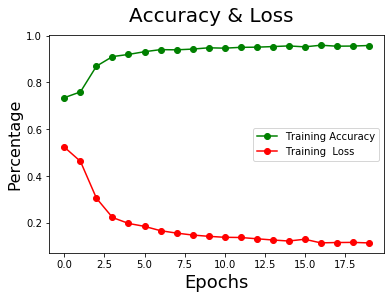

In [81]:
# Plotting the Training accuracy and loss
epochs = list(range(20))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig = plt.figure()
plt.plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(epochs , train_loss , 'ro-' , label = 'Training  Loss')
plt.legend()
fig.suptitle('Accuracy & Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Percentage', fontsize=16)